In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import joblib

In [17]:
# 1. Load data
df = pd.read_csv("../data/heart_diseases_data/heart.csv")

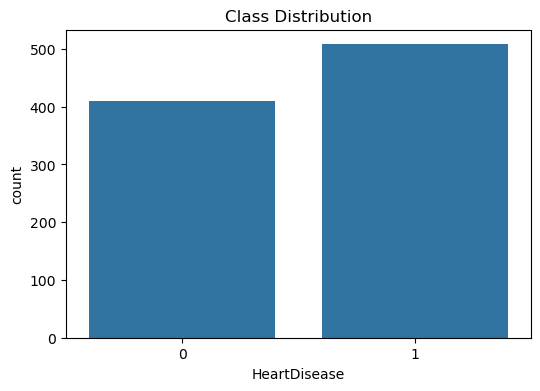

In [18]:
# 2. Basic EDA
plt.figure(figsize=(6,4))
sns.countplot(x="HeartDisease", data=df)
plt.title("Class Distribution")
plt.show()

In [19]:
print("Columns:", df.columns.tolist())
print(df.describe(), "\n")

Columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%

In [20]:
# 3. One-hot encode categorical features
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numeric_cols = [col for col in df.columns if col not in categorical_cols + ['HeartDisease']]

In [21]:
# 4. Spliting the data in X and Y
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

In [22]:
# 5. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [23]:
# 6. Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)
pipe = Pipeline([
    ('pre', preprocessor),
    ('logreg', LogisticRegression(solver='lbfgs', max_iter=500, random_state=42))
])

In [24]:
# 7. Train and save
pipe.fit(X_train, y_train)
joblib.dump(pipe, "../trained_models/heart_logreg_pipeline.pkl")
print("Pipeline saved as trained_models/heart_logreg_pipeline.pkl")

Pipeline saved as trained_models/heart_logreg_pipeline.pkl


In [25]:
# 8. Evaluate
y_pred = pipe.predict(X_test)
y_pred_probs = pipe.predict_proba(X_test)[:, 1]

In [26]:
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184

Test Accuracy: 0.8859


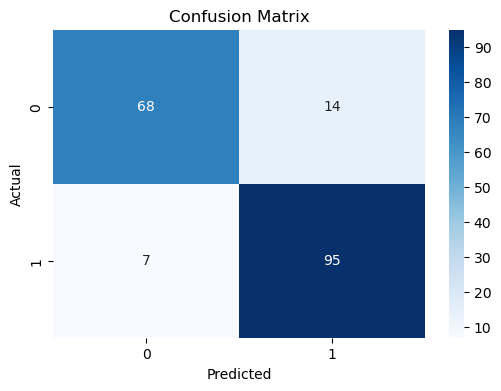

In [27]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

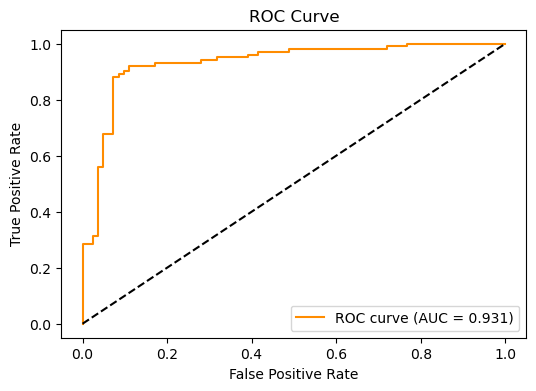

In [28]:
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
auc_score = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.3f})", color="darkorange")
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()